
[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Beberapa data awal:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             no

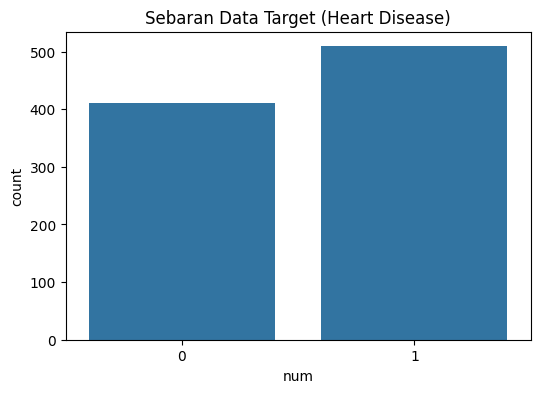

Proses Preprocessing di Notebook Selesai!


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13052\2698929815.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [5]:
import sys
!{sys.executable} -m pip install seaborn matplotlib scikit-learn pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Memuat Dataset (Kriteria: Data Loading)
# Menggunakan path folder yang terlihat di screenshot VS Code kamu
df = pd.read_csv('../heart_disease_uci_raw/heart_disease_uci.csv')

# 2. Menampilkan Data
print("Beberapa data awal:")
print(df.head())

# 3. EDA: Cek data kosong (Kriteria: EDA)
print("\nCek Data Kosong:")
print(df.isnull().sum())

# 4. EDA: Visualisasi Target (Wajib untuk nilai Basic)
# Menyiapkan data target biner (0: Sehat, 1: Sakit)
df_eda = df.copy()
df_eda['num'] = df_eda['num'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df_eda)
plt.title('Sebaran Data Target (Heart Disease)')
plt.show()

# 5. Preprocessing: Penanganan Missing Values (Kriteria: Preprocessing)
# Isi kolom numerik dengan mean dan kategorikal dengan modus
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 6. Preprocessing: Encoding & Scaling (Kriteria: Preprocessing)
X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Proses Preprocessing di Notebook Selesai!")

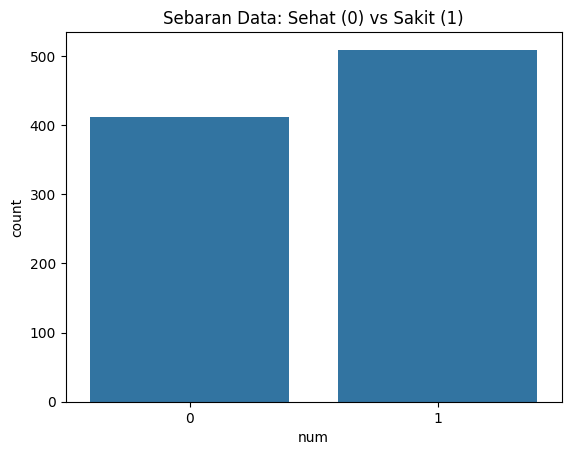

Jumlah data kosong setelah dibersihkan: 0


In [6]:
# 1. Visualisasi Target (Wajib untuk Basic)
import seaborn as sns
import matplotlib.pyplot as plt

df_eda = df.copy()
df_eda['num'] = df_eda['num'].apply(lambda x: 1 if x > 0 else 0)
sns.countplot(x='num', data=df_eda)
plt.title('Sebaran Data: Sehat (0) vs Sakit (1)')
plt.show()

# 2. Preprocessing (Kriteria: Menangani Missing Values)
# Isi kolom angka dengan rata-rata, kolom teks dengan nilai terbanyak (modus)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Jumlah data kosong setelah dibersihkan:", df.isnull().sum().sum())